 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [334]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [335]:
# Reading whale returns
whale_file = Path('../Starter_Code/Resources/whale_returns.csv')
whale_returns = pd.read_csv(whale_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [336]:
# Count nulls
whale_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [337]:
# Drop nulls
whale_returns.dropna().head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [338]:
# Reading algorithmic returns
algo_file = Path('../Starter_Code/Resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_file, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_returns.head()


,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [339]:
# Count nulls
algo_returns.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [340]:
# Drop nulls
algo_returns.dropna().head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [341]:
# Reading S&P 500 Closing Prices
sp500_file = Path('../Starter_Code/Resources/sp500_history.csv')
sp500_returns = pd.read_csv(sp500_file, index_col="Date", parse_dates=True)
sp500_returns.sort_index(inplace=True)
sp500_returns.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [342]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [343]:
# Fix Data Types
sp500_returns['Close'] = sp500_returns['Close'].replace(r'[$,]','',regex=True).astype('float64')
sp500_returns.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [344]:
# Calculate Daily Returns
sp500_daily_returns = sp500_returns.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [345]:
# Drop nulls
sp500_daily_returns.dropna().head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [346]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ['S&P 500']
sp500_daily_returns.head()

,S&P 500
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


## Combine Whale, Algorithmic, and S&P 500 Returns

In [347]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
df_portfolio = pd.concat([whale_returns,algo_returns,sp500_daily_returns], axis='columns', join='inner')
df_portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

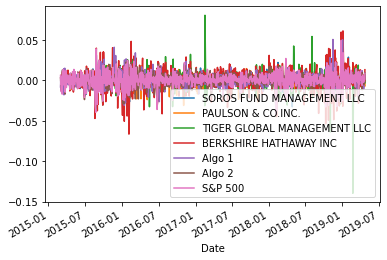

In [348]:
# Plot daily returns of all portfolios
df_portfolio.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

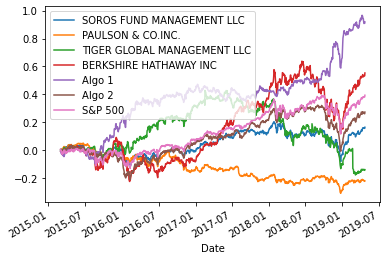

In [349]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+df_portfolio).cumprod()-1
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

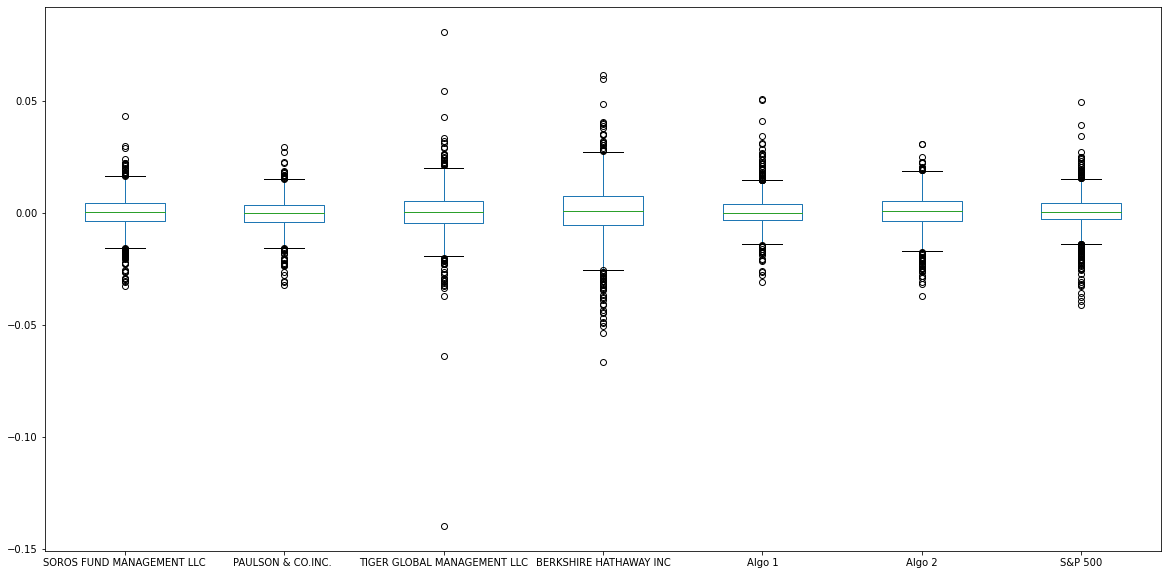

In [350]:
# Box plot to visually show risk
df_portfolio.plot(kind='box', figsize=(20,10))

### Calculate Standard Deviations

In [351]:
# Calculate the daily standard deviations of all portfolios
df_std = df_portfolio.std()
df_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007621
Algo 2                         0.008339
S&P 500                        0.008551
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [352]:
# Calculate  the daily standard deviation of S&P 500
df_std[('S&P 500')]

# Determine which portfolios are riskier than the S&P 500
risky = df_std[(df_std['S&P 500'] < df_std)]
print(f'These portfolios are riskier than the S&P 500: \n{risky}')

These portfolios are riskier than the S&P 500: 
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


### Calculate the Annualized Standard Deviation

In [353]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = df_portfolio.std() * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120987
Algo 2                         0.132374
S&P 500                        0.135751
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

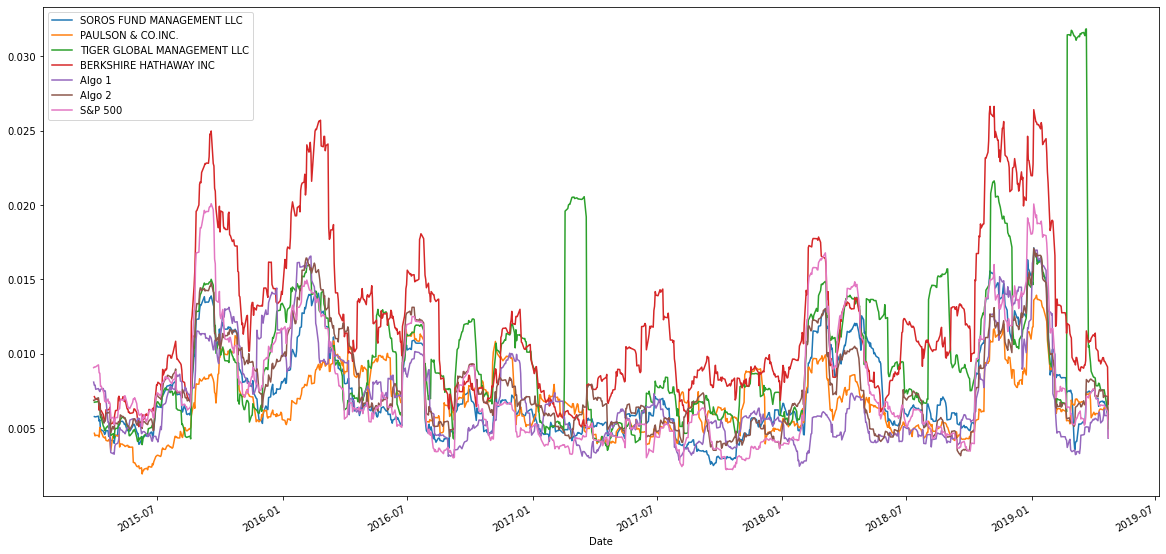

In [354]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = df_portfolio.rolling(window=21).std()

# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

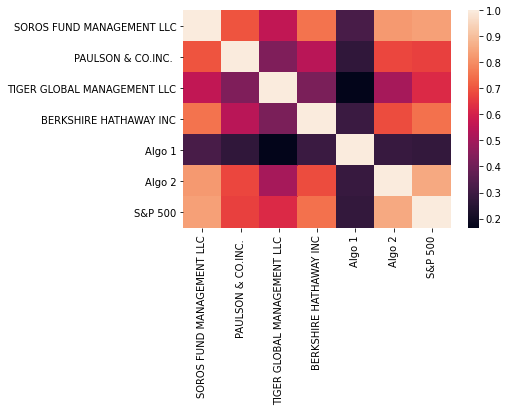

In [355]:
# Calculate the correlation
port_corr = df_portfolio.corr()

# Display de correlation matrix
sns.heatmap(port_corr)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

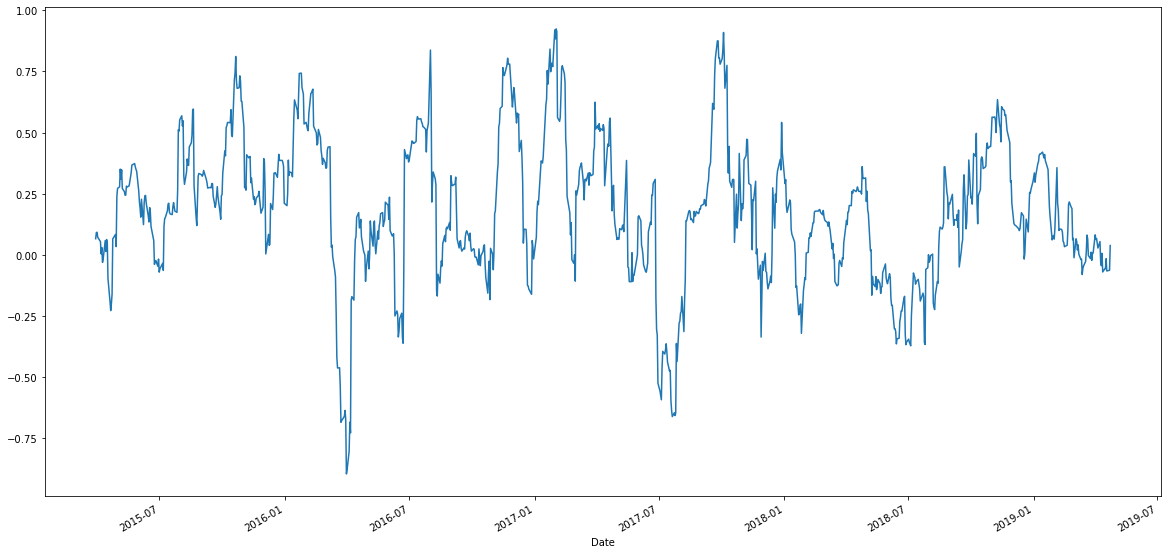

In [356]:
# Calculate covariance of a single portfolio
algo_cov = df_portfolio["Algo 1"].rolling(window=21).cov(df_portfolio["S&P 500"])
algo_cov

# Calculate variance of S&P 500
sp500_var = df_portfolio["S&P 500"].rolling(window=21).var()
sp500_var

# Computing beta
beta = algo_cov / sp500_var

# Plot beta trend
beta.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [357]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [358]:
# Annualized Sharpe Ratios
sharpe_ratios = (df_portfolio.mean() * 252) / (df_portfolio.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.360829
Algo 2                         0.506929
S&P 500                        0.658706
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

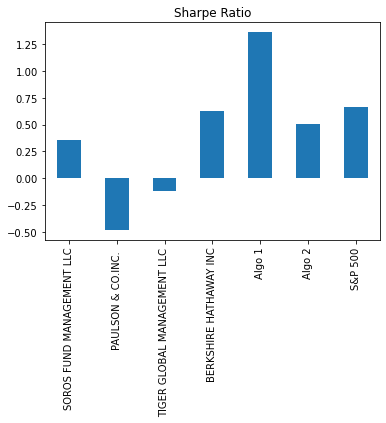

In [359]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [365]:
# Reading data from 1st stock
google_file = Path('../Starter_Code/Resources/goog_historical.csv')
google_data = pd.read_csv(google_file, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True, usecols=['Trade DATE','NOCP'])
google_data.head()

,NOCP
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [366]:
# Reading data from 2nd stock
aapl_file = Path('../Starter_Code/Resources/aapl_historical.csv')
aapl_data = pd.read_csv(aapl_file, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True, usecols=['Trade DATE','NOCP'])
aapl_data.head()

,NOCP
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [367]:
# Reading data from 3rd stock
cost_file = Path('../Starter_Code/Resources/cost_historical.csv')
cost_data = pd.read_csv(cost_file, index_col='Trade DATE', infer_datetime_format=True, parse_dates=True, usecols=['Trade DATE','NOCP'])
cost_data.head()

,NOCP
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [393]:
# Combine all stocks in a single DataFrame
df_combined = pd.concat([google_data,aapl_data,cost_data], axis='columns', join='inner')
df_combined.columns = ['GOOG','AAPL','COST']
df_new_combined = df_combined.sort_index().pct_change()
df_new_combined.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479


In [394]:
# Reset Date index
df_new_combined.reset_index(inplace=True)
df_new_combined.head()

In [395]:
# Reorganize portfolio data by having a column per symbol


In [397]:
# Calculate daily returns
new_daily_returns = df_new_combined.pct_change()
new_daily_returns
# Drop NAs
new_daily_returns.dropna(inplace=True)
# Display sample data
new_daily_returns.head()

,GOOG,AAPL,COST
Trade DATE,,,
2018-05-15,-11.790218,2.895452,-4.331291
2018-05-16,-1.123479,-2.026877,-9.091523
2018-05-17,-2.249029,-1.677584,-0.728937
2018-05-18,2.857251,-0.424935,-1.715895
2018-05-21,-2.093346,-2.948261,-2.034567


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [400]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = new_daily_returns.dot(weights)

# Display sample data
weighted_returns.head()

Trade DATE
2018-05-15   -4.408686
2018-05-16   -4.080626
2018-05-17   -1.551850
2018-05-18    0.238807
2018-05-21   -2.358725
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [418]:
# Join your returns DataFrame to the original returns DataFrame
joined_df = pd.concat([weighted_returns,df_portfolio], axis='columns', join='inner')
joined_df.rename(columns={0:'Custom Portfolio'}, inplace=True)
joined_df.head()

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-15,-4.408686,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,-4.080626,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-1.551850,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,0.238807,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
2018-05-21,-2.358725,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.007387


In [419]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
joined_df.dropna(inplace=True)
joined_df.head()

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
2018-05-15,-4.408686,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,-4.080626,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-1.551850,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,0.238807,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
2018-05-21,-2.358725,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.007387


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [420]:
# Calculate the annualized `std`
annualized_std_joined = joined_df.std() * np.sqrt(252)
annualized_std_joined

Custom Portfolio               265.303320
SOROS FUND MANAGEMENT LLC        0.146987
PAULSON & CO.INC.                0.116980
TIGER GLOBAL MANAGEMENT LLC      0.233023
BERKSHIRE HATHAWAY INC           0.247680
Algo 1                           0.133988
Algo 2                           0.139843
S&P 500                          0.152376
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

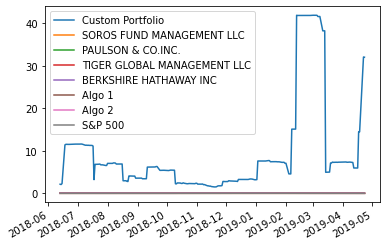

In [421]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
joined_df.rolling(window=21).std().plot()


### Calculate and plot the correlation

In [422]:
# Calculate and plot the correlation
corr_port = joined_df.corr()
corr_port

,Custom Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Custom Portfolio,1.000000,-0.047069,-0.084205,-0.034725,-0.024998,-0.044326,-0.109847,-0.080882
SOROS FUND MANAGEMENT LLC,-0.047069,1.000000,0.791962,0.478640,0.816675,0.337824,0.862928,0.876995
PAULSON & CO.INC.,-0.084205,0.791962,1.000000,0.485385,0.650757,0.361301,0.783724,0.766690
TIGER GLOBAL MANAGEMENT LLC,-0.034725,0.478640,0.485385,1.000000,0.325462,0.114560,0.409478,0.481022
BERKSHIRE HATHAWAY INC,-0.024998,0.816675,0.650757,0.325462,1.000000,0.327000,0.782866,0.852312
Algo 1,-0.044326,0.337824,0.361301,0.114560,0.327000,1.000000,0.365552,0.289365
Algo 2,-0.109847,0.862928,0.783724,0.409478,0.782866,0.365552,1.000000,0.875745
S&P 500,-0.080882,0.876995,0.766690,0.481022,0.852312,0.289365,0.875745,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [424]:
# Calculate and plot Beta
covariance = joined_df['Custom Portfolio'].cov(joined_df['S&P 500'])
variance = joined_df['S&P 500'].var()
beta = covariance / variance
beta

-140.82351164907487

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [425]:
# Calculate Annualzied Sharpe Ratios
new_sharpe_ratio = (joined_df.mean()*252) / (joined_df.std()*np.sqrt(252))
new_sharpe_ratio

Custom Portfolio              -0.647654
SOROS FUND MANAGEMENT LLC      0.431622
PAULSON & CO.INC.              0.259283
TIGER GLOBAL MANAGEMENT LLC   -1.036405
BERKSHIRE HATHAWAY INC         0.160092
Algo 1                         2.032666
Algo 2                         0.068300
S&P 500                        0.579865
dtype: float64

<AxesSubplot:>

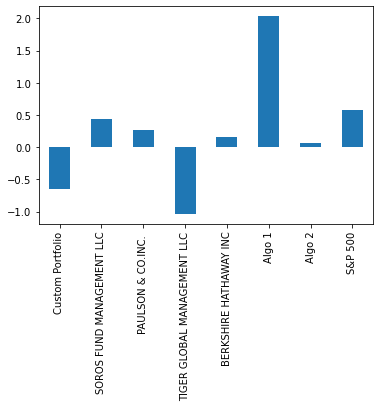

In [426]:
# Visualize the sharpe ratios as a bar plot
new_sharpe_ratio.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

In [427]:
print('My Portfolio underperformed.  I should model my investments after Algo 1!')

My Portfolio underperformed.  I should model my investments after Algo 1!
